In [1]:
%matplotlib notebook

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def read_noise_covariance_matrix(filename):
    f = open(filename,'rb')
    xml_length = np.fromfile(f,dtype=np.uint32,count=1)
    xml_header = f.read(xml_length)
    noise_dwell_time = np.fromfile(f,dtype=np.float32,count=1)
    cov_length = np.fromfile(f,dtype=np.uint64,count=1)
    ndim = np.fromfile(f,dtype=np.uint64,count=1)
    dims = np.fromfile(f,dtype=np.uint64,count=ndim)
    cov_mtx = np.fromfile(f,dtype=np.complex64,count=np.prod(dims))
    cov_mtx = cov_mtx.reshape(dims)
    f.close()
    return cov_mtx

def normalize_noise_covariance_matrix(nmtx):
    ncoils = nmtx.shape[0]
    mtx_out = np.zeros(nmtx.shape,dtype=nmtx.dtype)
    for c1 in range(0,ncoils):
        for c2 in range(0,ncoils):
            mtx_out[c1,c2] = nmtx[c1,c2] / (np.sqrt(nmtx[c1,c1])*np.sqrt(nmtx[c2,c2])) 
    return mtx_out

In [7]:
noise_cov_mtx_aera = read_noise_covariance_matrix('/tmp/gadgetron/GadgetronNoiseCovarianceMatrix_41598_0747356_0747361_203')

/home/hansenms/virtualenv/p3/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/home/hansenms/virtualenv/p3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


<IPython.core.display.Javascript object>


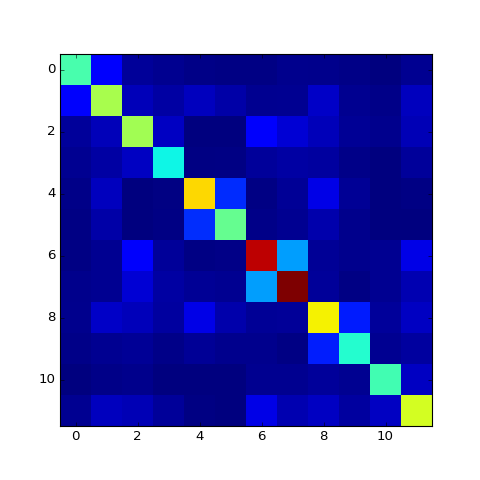

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(np.abs(noise_cov_mtx_aera),cmap=plt.cm.jet,interpolation='none')

<IPython.core.display.Javascript object>


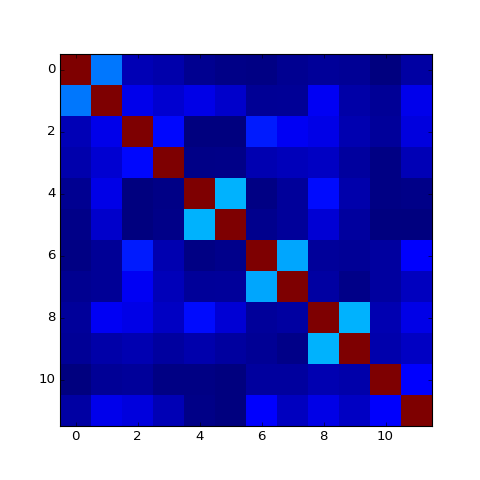

In [24]:
nmtx = normalize_noise_covariance_matrix(noise_cov_mtx_aera)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(np.abs(nmtx),cmap=plt.cm.jet,interpolation='none')

In [10]:
noise_cov_mtx_panda = read_noise_covariance_matrix('/tmp/gadgetron/GadgetronNoiseCovarianceMatrix_68001_641315_641320_230')

/home/hansenms/virtualenv/p3/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/home/hansenms/virtualenv/p3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


<IPython.core.display.Javascript object>


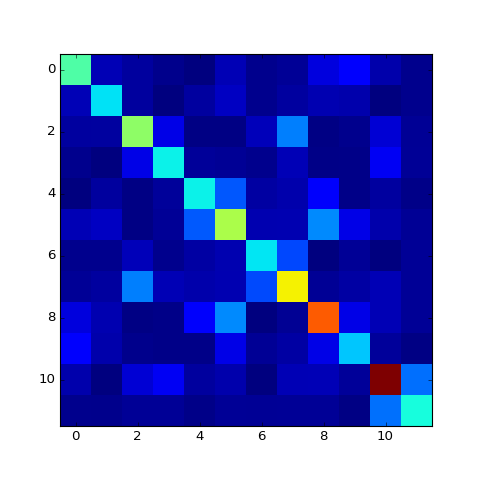

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(np.abs(noise_cov_mtx_panda),cmap=plt.cm.jet,interpolation='none')

<IPython.core.display.Javascript object>


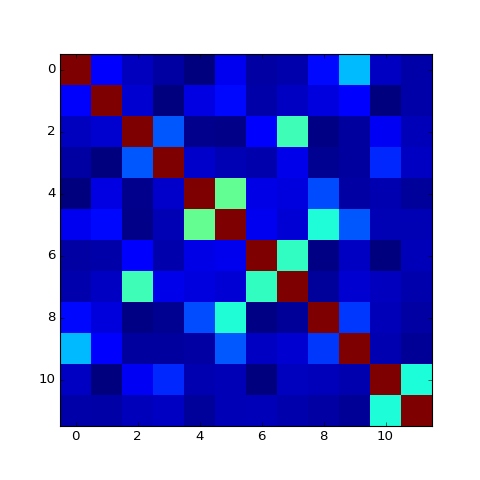

In [25]:
nmtx = normalize_noise_covariance_matrix(noise_cov_mtx_panda)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(np.abs(nmtx),cmap=plt.cm.jet,interpolation='none')

In [28]:
(np.arccos(1485.0/2135.0)*(180/np.pi))/60.0

0.76548184447083623